**토픽 모델링 - LDA**
- 20 뉴스그룹 데이터 이용

In [38]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

#위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

#LDA는 Count기반의 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',
                             ngram_range=(1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [39]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [40]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [41]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]

        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names_out()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import glob ,os

#다음은 디렉터리 설정
path = r'/content/drive/MyDrive/Colab_Notebooks/OpinosisDataset1.0/topics'
#path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합,
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')

    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,navigation_amazon_kindle,...
1,rooms_swissotel_chicago,...
2,directions_garmin_nuvi_255W_gps,...
3,seats_honda_accord_2008,...
4,service_holiday_inn_london,...


In [46]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [51]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [55]:
from sklearn.cluster import KMeans

#5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,navigation_amazon_kindle,...,4
1,rooms_swissotel_chicago,...,0
2,directions_garmin_nuvi_255W_gps,...,3
3,seats_honda_accord_2008,...,1
4,service_holiday_inn_london,...,0


In [57]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
39,bathroom_bestwestern_hotel_sfo,...,0
15,food_holiday_inn_london,...,0
37,food_swissotel_chicago,...,0
43,free_bestwestern_hotel_sfo,...,0
50,location_bestwestern_hotel_sfo,...,0
29,location_holiday_inn_london,...,0
48,parking_bestwestern_hotel_sfo,...,0
11,price_holiday_inn_london,...,0
31,room_holiday_inn_london,...,0
42,rooms_bestwestern_hotel_sfo,...,0


In [58]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
21,comfort_honda_accord_2008,...,1
44,comfort_toyota_camry_2007,...,1
30,gas_mileage_toyota_camry_2007,...,1
47,interior_honda_accord_2008,...,1
13,interior_toyota_camry_2007,...,1
38,mileage_honda_accord_2008,...,1
41,performance_honda_accord_2008,...,1
46,quality_toyota_camry_2007,...,1
3,seats_honda_accord_2008,...,1
12,transmission_toyota_camry_2007,...,1


In [59]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
19,battery-life_amazon_kindle,...,2
32,battery-life_ipod_nano_8gb,...,2
20,battery-life_netbook_1005ha,...,2
18,keyboard_netbook_1005ha,...,2
14,performance_netbook_1005ha,...,2
6,screen_ipod_nano_8gb,...,2
33,screen_netbook_1005ha,...,2
26,size_asus_netbook_1005ha,...,2
10,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,2
17,video_ipod_nano_8gb,...,2


- 군집 개수가 약간 많게 설정돼 있어 5개에서 3개로 낮춤

In [62]:
from sklearn.cluster import KMeans

#3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

#소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,filename,opinion_text,cluster_label
0,navigation_amazon_kindle,...,0
19,battery-life_amazon_kindle,...,0
20,battery-life_netbook_1005ha,...,0
23,satellite_garmin_nuvi_255W_gps,...,0
24,speed_garmin_nuvi_255W_gps,...,0
49,fonts_amazon_kindle,...,0
26,size_asus_netbook_1005ha,...,0
18,keyboard_netbook_1005ha,...,0
28,screen_garmin_nuvi_255W_gps,...,0
33,screen_netbook_1005ha,...,0


**군집별 핵심 단어 추출하기**

In [63]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape:', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape: (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


In [64]:
#군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num,
                        top_n_features=10):
  cluster_details = {}

  #cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
  #군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구학 위함.
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

  #개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    #개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    #cluster_centers_.argsort()[:, ::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [ feature_names[ind] for ind in top_feature_indexes ]

    #top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상대값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num,
                                                        top_feature_indexes].tolist()

    #cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features.values'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]['filenames'] = filenames

  return cluster_details

In [71]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [72]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                      feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['navigation_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'buttons_amazon_kindle', 'screen_ipod_nano_8gb', 'updates_garmin_nuvi_255W_gps', 'features_windows7', 'sound_ipod_nano_8gb']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['rooms_swissotel_chicago', 'service_holiday_inn_london', 'staff_swissotel_chicago', 'price_holiday_inn_london', 'food_holiday_inn_london', 'service_bestwestern_hotel_sfo', 'service_swissotel_hotel_chicago']
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['seats_honda_accord_2008', 'transmission_toyota_camry_2007', 'interior_toyota_camry_2007', 'comfort_honda_accord_2008', 'gas_mileage_toyota_

**8.8 문서 유사도**

- 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 cos_similarity() 함수 작성

In [10]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

In [11]:
#doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환

from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if yout ake the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 20)


In [12]:
#TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

#첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

#첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.191


In [19]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.231
문장 2, 문장 3 Cosine 유사도: 0.522


- sklearn.metrics.pairwise.cosine_similarity API 이용

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.19108997 0.23110317]]


- cosine_similarity()는 쌍으로 (pair) 코사인 유사도 값 제공 가능
- 예: 1번째 문서와 2,3번째 문서의 코사인 유사도

In [23]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.19108997 0.23110317]
 [0.19108997 1.         0.52189732]
 [0.23110317 0.52189732 1.        ]]
shape: (3, 3)


**Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [10]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/Colab_Notebooks/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

#cluster_label=1인 데이터는 호텔로 군집화 데이터. DataFrame에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화된 문서들의 DataFrame Index:', hotel_indexes)

#호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도 #####')

# document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
#이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 DataFrame Index: Index([18, 24, 25, 26, 28, 32, 33, 34, 35, 38, 39, 42, 44, 45, 47, 48], dtype='int64')
##### 비교 기준 문서명 performance_honda_accord_2008 와 타 문서 유사도 #####
[[1.         0.06562183 0.24515472 0.14355714 0.19544761 0.27745184
  0.25016153 0.14589696 0.09611626 0.07508644 0.94217517 0.06487772
  0.07049362 0.27523861 0.27181547 0.17331798]]


Text(0.5, 1.0, 'performance_honda_accord_2008')

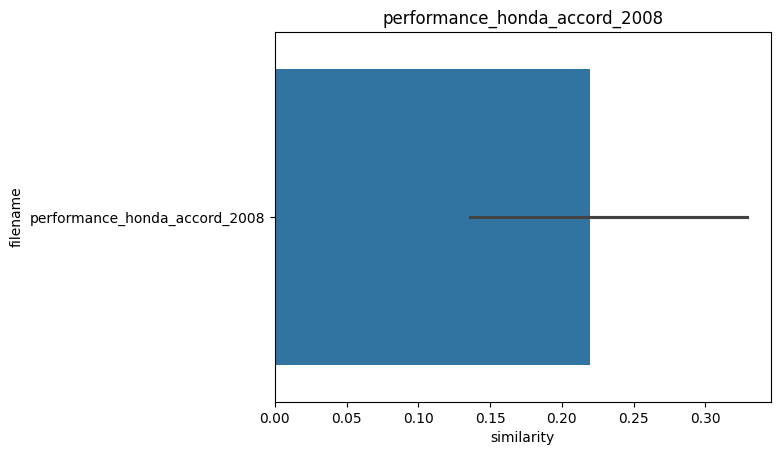

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

**09 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**


In [28]:
!pip3 install konlpy     # Python 3.x

In [30]:
!pip install koreanize-matplotlib
!pip install konlpy --upgrade
!pip install tqdm --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.6 MB/s eta 0:00:00


In [15]:
import pandas as pd

train_df = pd.read_csv('/content/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [11]:
train_df['label'].value_counts()

label
0.0    10734
1.0    10661
Name: count, dtype: int64

In [34]:
pip install jpype1

In [40]:

pip install konlpy

In [16]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 개정판 소스 코드 변경(2019.12.24)
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [1]:
!pip install konlpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 23.8 MB/s eta 0:00:00


In [3]:
from konlpy.tag import Okt

In [4]:

okt = Okt()

def tw_tokenizer(text):
  #입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = okt.morphs(text)
  return tokens_ko

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# okt 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

KeyboardInterrupt: 

In [ ]:
#로지스틱 회귀 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

#파라미터 C 최적화를 위해 GridSearchCV 이용
params = {'C': [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

In [ ]:
from sklearn.metrics import top_k_accuracy_score

#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

#classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))